# Differentiation Rules
**Chain Rule, Product Rule, and Quotient Rule**

These rules allow us to compute derivatives of complicated functions by breaking them into simpler parts.

## 1. The Chain Rule

The **Chain Rule** is used when a function is composed of another function.

If
$$
y = f(g(x))
$$
then
$$
\frac{dy}{dx} = f'(g(x)) \cdot g'(x)
$$

In words:
**Differentiate the outer function and multiply by the derivative of the inner function.**

### Example 1

Let
$$
y = (3x^2 + 5)^4
$$

Outer function:
$$
f(u) = u^4
$$

Inner function:
$$
u = 3x^2 + 5
$$

Differentiate:

$$
\frac{dy}{dx} = 4(3x^2+5)^3 \cdot \frac{d}{dx}(3x^2+5)
$$

$$
\frac{dy}{dx} = 4(3x^2+5)^3 \cdot 6x
$$

$$
\frac{dy}{dx} = 24x(3x^2+5)^3
$$

### Example 2

$$
y = \sin(5x^2)
$$

Outer function:
$$
\sin(u)
$$
Inner function:
$$
u = 5x^2
$$

$$
\frac{dy}{dx} = \cos(5x^2) \cdot 10x
$$

## 2. The Product Rule

Used when a function is the **product** of two functions.

If
$$
y = f(x) g(x)
$$
then
$$
\frac{dy}{dx} = f'(x) g(x) + f(x) g'(x)
$$

In words:
**Differentiate the first and multiply by the second, then add the first times the derivative of the second.**

### Example 1

$$
y = x^2 \sin x
$$

Let
$$
f(x)=x^2, \quad g(x)=\sin x
$$

$$
\frac{dy}{dx} = (2x)\sin x + x^2 \cos x
$$

### Example 2

$$
y = x e^x
$$

$$
\frac{dy}{dx} = 1 \cdot e^x + x \cdot e^x
$$

$$
\frac{dy}{dx} = e^x(1+x)
$$

## 3. The Quotient Rule

Used when one function is divided by another.

If
$$
y = \frac{f(x)}{g(x)}
$$
then
$$
\frac{dy}{dx} =
\frac{f'(x)g(x)-f(x)g'(x)}{g(x)^2}
$$

### Example 1

$$
y=\frac{x^2}{x+1}
$$

$$
f(x)=x^2, \quad g(x)=x+1
$$

$$
\frac{dy}{dx} =
\frac{2x(x+1)-x^2(1)}{(x+1)^2}
$$

$$
\frac{dy}{dx} =
\frac{2x^2+2x-x^2}{(x+1)^2}
$$

$$
\frac{dy}{dx} =
\frac{x^2+2x}{(x+1)^2}
$$

### Example 2

$$
y=\frac{\sin x}{x}
$$

$$
\frac{dy}{dx} =
\frac{x\cos x-\sin x}{x^2}
$$

## 4. Combining the Rules

Most real problems use **more than one rule at once**.

### Example

$$
y = (x^2+1)^3 \sin x
$$

This is a **product** of
$$
(x^2+1)^3
$$
and
$$
\sin x
$$

So use the Product Rule:

$$
\frac{dy}{dx} =
\frac{d}{dx}(x^2+1)^3 \cdot \sin x
+
(x^2+1)^3 \cdot \cos x
$$

Now apply the Chain Rule to the first term:

$$
\frac{d}{dx}(x^2+1)^3 = 3(x^2+1)^2 \cdot 2x
$$

So

$$
\frac{dy}{dx} =
6x(x^2+1)^2\sin x
+
(x^2+1)^3 \cos x
$$

## 5. Summary

| Situation | Rule |
|--------|------|
| Composition $f(g(x))$ | Chain Rule |
| Product $f(x)g(x)$ | Product Rule |
| Quotient $\frac{f(x)}{g(x)}$ | Quotient Rule |

These three rules allow you to differentiate almost any function you will encounter in calculus.

## Examples in Python

### Symbolic Chain Rule (Polynomial inside a power)

In [23]:
import sympy as sp

x = sp.symbols('x')

# Example: y = (3x^2 + 5)^4
u = 3*x**2 + 5
y = u**4

dy_dx = sp.diff(y, x)

y, dy_dx

((3*x**2 + 5)**4, 24*x*(3*x**2 + 5)**3)

Mathematically:

$$
y = (3x^2 + 5)^4,\qquad \frac{dy}{dx} = 4(3x^2+5)^3 \cdot 6x
$$

#### Verify Chain Rule by Explicit “Outer ∘ Inner”

Chain rule:
$$
\frac{d}{dx} f(g(x)) = f’(g(x))\cdot g’(x)
$$

In [24]:
# Define outer f(u) = u^4 and inner u(x) = 3x^2 + 5
u_sym = sp.Symbol('u')
u_expr = 3*x**2 + 5
f_u = u_sym**4

# Chain rule formula: df/du * du/dx
df_du = sp.diff(f_u, u_sym)     # derivative w.r.t. u
du_dx = sp.diff(u_expr, x)

# Substitute u_expr back into df_du
chain_rule = (df_du.subs(u_sym, u_expr)) * du_dx

# Compare against direct differentiation
direct = sp.diff((3*x**2 + 5)**4, x)

sp.simplify(direct - chain_rule)

0

### Trigonometric Chain Rule (sine of something)

In [25]:
# Example: y = sin(5x^2)
u = 5*x**2
y = sp.sin(u)

dy_dx = sp.diff(y, x)

y, dy_dx

(sin(5*x**2), 10*x*cos(5*x**2))

Mathematically:
$$
y=\sin(5x^2),\qquad \frac{dy}{dx}=\cos(5x^2)\cdot 10x
$$

#### Plot the Function and Its Derivative

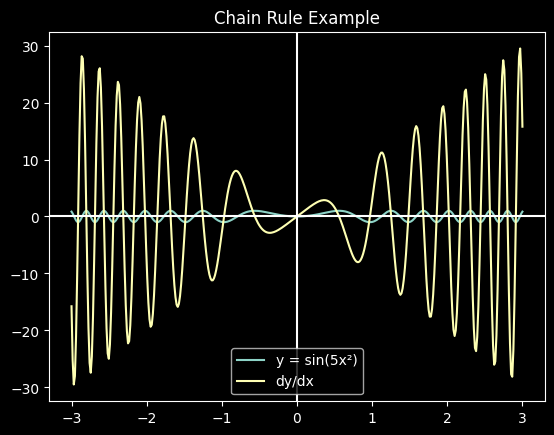

In [26]:
import numpy as np
import matplotlib.pyplot as plt

u = 5*x**2
y = sp.sin(u)
dy = sp.diff(y, x)

y_func = sp.lambdify(x, y, "numpy")
dy_func = sp.lambdify(x, dy, "numpy")

X = np.linspace(-3, 3, 400)

plt.plot(X, y_func(X), label="y = sin(5x²)")
plt.plot(X, dy_func(X), label="dy/dx")
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.title("Chain Rule Example")
plt.show()

#### Numerical Check at a Point

In [27]:
x0 = 1.2

u = 5*x**2
y = sp.sin(u)

direct = sp.diff(y, x)

# Chain rule computed explicitly: cos(u) * du/dx
chain_rule = sp.cos(u) * sp.diff(u, x)

lhs = direct.subs(x, x0)
rhs = chain_rule.subs(x, x0)

float(lhs), float(rhs)

(7.300215774387063, 7.300215774387063)

### Symbolic Product Rule (Polynomial inside a power)

In [28]:
import sympy as sp

# define symbol
x = sp.symbols('x')

# define functions
f = x**2
g = sp.sin(x)

# define product
y = f * g

# differentiate
dy_dx = sp.diff(y, x)

y, dy_dx

(x**2*sin(x), x**2*cos(x) + 2*x*sin(x))

#### Verify Product Rule Formula

In [29]:
# product rule formula: f'g + fg'
product_rule = sp.diff(f, x)*g + f*sp.diff(g, x)

sp.simplify(dy_dx - product_rule)

0

This confirms that the product rule formula is correct.

$$
\frac{d}{dx}(fg)=f’g+fg’
$$

### Another Example

In [30]:
f = x * sp.exp(x)
g = sp.cos(x)

y = f * g

dy_dx = sp.diff(y, x)
product_rule = sp.diff(f,x)*g + f*sp.diff(g,x)

sp.simplify(dy_dx - product_rule)

0

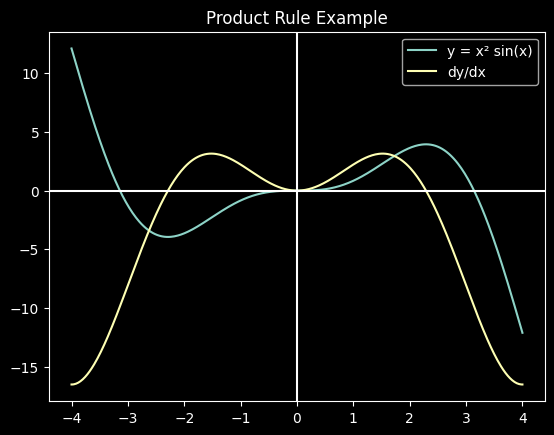

In [31]:
import numpy as np
import matplotlib.pyplot as plt

f = x**2
g = sp.sin(x)
y = f * g
dy = sp.diff(y, x)

f_func = sp.lambdify(x, y, "numpy")
dy_func = sp.lambdify(x, dy, "numpy")

X = np.linspace(-4, 4, 400)

plt.plot(X, f_func(X), label="y = x² sin(x)")
plt.plot(X, dy_func(X), label="dy/dx")
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.title("Product Rule Example")
plt.show()

This visually shows how:

$$
y = f(x)g(x)
$$

$$
\frac{dy}{dx} = f’(x)g(x) + f(x)g’(x)
$$

produce different curves.

In [32]:
x0 = 1.5

lhs = dy.subs(x, x0)
rhs = (sp.diff(f,x)*g + f*sp.diff(g,x)).subs(x, x0)

float(lhs), float(rhs)

(3.151643663564495, 3.151643663564495)

## Symbolic Quotient Rule

In [33]:
import sympy as sp

x = sp.symbols('x')

# Define functions
f = x**2
g = x + 1

# Define quotient
y = f / g

# Differentiate directly
dy_dx = sp.diff(y, x)

y, dy_dx

(x**2/(x + 1), -x**2/(x + 1)**2 + 2*x/(x + 1))

Expected mathematics:

$$
y = \frac{x^2}{x+1}
$$

$$
\frac{dy}{dx} = \frac{(2x)(x+1)-x^2(1)}{(x+1)^2}
$$

#### Verify the Quotient Rule Formula

The quotient rule states:

$$
\frac{d}{dx}\left(\frac{f}{g}\right)=
\frac{f’g - fg’}{g^2}
$$

In [34]:
quotient_rule = (sp.diff(f,x)*g - f*sp.diff(g,x)) / g**2

sp.simplify(dy_dx - quotient_rule)

0

### Trigonometric Example

In [35]:
f = sp.sin(x)
g = x

y = f / g

dy_dx = sp.diff(y, x)
quotient_rule = (sp.diff(f,x)*g - f*sp.diff(g,x)) / g**2

sp.simplify(dy_dx - quotient_rule)

0

Mathematically:

$$
y=\frac{\sin x}{x}
$$

$$
\frac{dy}{dx}=\frac{x\cos x-\sin x}{x^2}
$$

#### Plot the Function and its Derivative

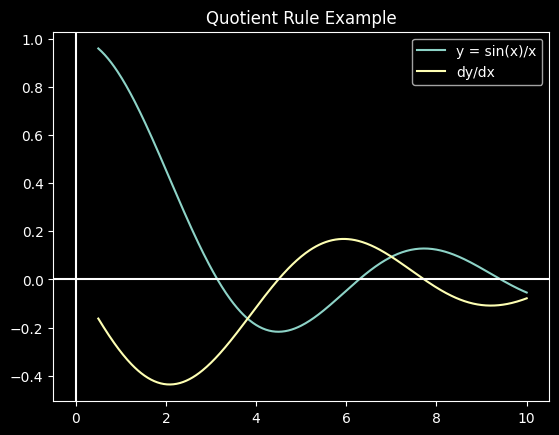

In [36]:
import numpy as np
import matplotlib.pyplot as plt

f = sp.sin(x)
g = x
y = f/g
dy = sp.diff(y, x)

f_func = sp.lambdify(x, y, "numpy")
dy_func = sp.lambdify(x, dy, "numpy")

X = np.linspace(0.5, 10, 400)   # avoid x = 0

plt.plot(X, f_func(X), label="y = sin(x)/x")
plt.plot(X, dy_func(X), label="dy/dx")
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.title("Quotient Rule Example")
plt.show()

#### Numerical Verification at a Point

In [37]:
x0 = 2.5

lhs = dy.subs(x, x0)
rhs = ((sp.diff(f,x)*g - f*sp.diff(g,x)) / g**2).subs(x, x0)

float(lhs), float(rhs)

(-0.4162129892754065, -0.4162129892754065)

## Combined Example
**Chain Rule + Product Rule + Quotient Rule**

Consider the function

$$
y = \frac{(x^2+1)^3 \sin x}{x+2}
$$

This function combines all three differentiation rules:

- The numerator is a **product**
  $$
  (x^2+1)^3 \cdot \sin x
  $$
- Inside $(x^2+1)^3$ there is a **composition**, so the **Chain Rule** applies.
- The whole expression is a **quotient** over $(x+2)$, so the **Quotient Rule** applies.

### Step 1 — Identify numerator and denominator

Let

$$
f(x) = (x^2+1)^3 \sin x
$$

$$
g(x) = x+2
$$

Then

$$
y=\frac{f(x)}{g(x)}
$$

By the **Quotient Rule**

$$
\frac{dy}{dx}=\frac{f'(x)g(x)-f(x)g'(x)}{g(x)^2}
$$

## Step 2 — Differentiate the denominator

$$
g(x)=x+2 \quad\Rightarrow\quad g'(x)=1
$$

## Step 3 — Differentiate the numerator (Product Rule)

$$
f(x)=(x^2+1)^3 \sin x
$$

So

$$
f'(x)=\frac{d}{dx}(x^2+1)^3 \cdot \sin x
+
(x^2+1)^3 \cdot \cos x
$$

### Step 4 — Apply the Chain Rule

Let

$$
u = x^2+1
$$

Then

$$
\frac{d}{dx}(u^3)=3u^2\frac{du}{dx}
$$

and

$$
\frac{du}{dx}=2x
$$

So

$$
\frac{d}{dx}(x^2+1)^3 = 3(x^2+1)^2 \cdot 2x = 6x(x^2+1)^2
$$

### Step 5 — Assemble $f'(x)$

$$
f'(x)=6x(x^2+1)^2\sin x+(x^2+1)^3\cos x
$$

### Step 6 — Apply the Quotient Rule

$$
\frac{dy}{dx}=
\frac{\Big[6x(x^2+1)^2\sin x+(x^2+1)^3\cos x\Big](x+2)-(x^2+1)^3\sin x}{(x+2)^2}
$$

This is the derivative of

$$
y=\frac{(x^2+1)^3\sin x}{x+2}.
$$

Direct vs quotient-rule simplification = 0


Eq(y, (x**2 + 1)**3*sin(x)/(x + 2))

Eq(dy/dx, (x**2 + 1)**2*((x + 2)*(6*x*sin(x) + (x**2 + 1)*cos(x)) - (x**2 + 1)*sin(x))/(x + 2)**2)

Numeric check (direct, quotient-rule): 16.33578032711926 16.33578032711926


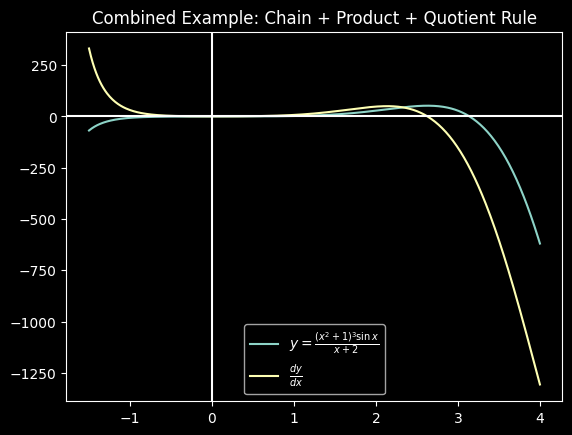

In [38]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x', real=True)

# Combined example using chain + product + quotient:
# y = [(x^2 + 1)^3 * sin(x)] / (x + 2)
f = (x**2 + 1)**3 * sp.sin(x)   # product + chain inside (x^2+1)^3
g = x + 2                      # simple denominator
y = f / g                      # quotient

# 1) Differentiate directly
dy_direct = sp.diff(y, x)

# 2) Differentiate via explicit quotient rule: (f'g - f g') / g^2
dy_quotient = (sp.diff(f, x)*g - f*sp.diff(g, x)) / g**2

# Confirm equivalence
print("Direct vs quotient-rule simplification =", sp.simplify(dy_direct - dy_quotient))

# Show a simplified closed form (optional; may still be large)
dy_simplified = sp.simplify(dy_direct)
display(sp.Eq(sp.Symbol("y"), y))
display(sp.Eq(sp.Symbol("dy/dx"), dy_simplified))

# 3) Numerical check at a point (avoid x = -2)
x0 = 1.3
lhs = dy_direct.subs(x, x0)
rhs = dy_quotient.subs(x, x0)
print("Numeric check (direct, quotient-rule):", float(lhs), float(rhs))

# 4) Plot y and dy/dx
y_func = sp.lambdify(x, y, "numpy")
dy_func = sp.lambdify(x, dy_simplified, "numpy")

X = np.linspace(-1.5, 4, 500)  # avoid x = -2 where the function is undefined
plt.plot(X, y_func(X), label=r"$y=\frac{(x^2+1)^3\sin x}{x+2}$")
plt.plot(X, dy_func(X), label=r"$\frac{dy}{dx}$")
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.title("Combined Example: Chain + Product + Quotient Rule")
plt.show()